# Introduction to dataset

I will use the dataset from NYC Department of Planning for this assignment. The dataset includes the neighborhoods in each borough in NYC. I will perform data exploration and plotting with coding. 

## Import data

We will import module `geopandas` to analyze the shapefile dataset. 

In [ ]:
# geopanda is a module that allows us to use various spatial data formats, and plot them on the map. 
import geopandas as gpd

Import New York Neighborhood Tabulation Dataset from [NYC Department of Planning](https://www1.nyc.gov/site/planning/data-maps/open-data/dwn-nynta.page). 

In [ ]:
# Import the New York Neighborhood Tabulation dataset. 
neighborhood = gpd.read_file('nynta.shp')

I have now imported the downloaded dataset to this notebook.

## Data exploration

There are many ways to explore a dataset. I will show some of the command I learned in class and apply them to the dataset I imported in the previous steps.

I first used `type` command to determine the type of the data.

In [18]:
#What's the data type?
type(neighborhood)

geopandas.geodataframe.GeoDataFrame

The data type is a geodataframe

I used the `head` command to see the first 5 rows of the dataset.

In [24]:
neighborhood.head()

,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Leng,Shape_Area,geometry
0,3,Brooklyn,047,BK88,Borough Park,39247.227831,5.400502e+07,"POLYGON ((990897.900 169268.121, 990588.252 16..."
1,4,Queens,081,QN51,Murray Hill,33266.904872,5.248828e+07,"POLYGON ((1038593.459 221913.355, 1039369.281 ..."
2,4,Queens,081,QN27,East Elmhurst,19816.712132,1.972685e+07,"POLYGON ((1022728.275 217530.808, 1023052.645 ..."
3,4,Queens,081,QN07,Hollis,20976.335600,2.288777e+07,"POLYGON ((1051539.660 201007.013, 1051920.726 ..."
4,3,Brooklyn,047,BK25,Homecrest,27514.022918,2.999197e+07,"POLYGON ((995746.857 161665.390, 995833.832 16..."


I used `dtypes` command to get datatypes from each column of the dataset

In [20]:
neighborhood.dtypes

BoroCode         int64
BoroName        object
CountyFIPS      object
NTACode         object
NTAName         object
Shape_Leng     float64
Shape_Area     float64
geometry      geometry
dtype: object

I used `info` command to get more detailed information about the dataset

In [27]:
neighborhood.info

<bound method DataFrame.info of      BoroCode       BoroName CountyFIPS NTACode  \
0           3       Brooklyn        047    BK88   
1           4         Queens        081    QN51   
2           4         Queens        081    QN27   
3           4         Queens        081    QN07   
4           3       Brooklyn        047    BK25   
..        ...            ...        ...     ...   
190         4         Queens        081    QN29   
191         4         Queens        081    QN50   
192         5  Staten Island        085    SI24   
193         5  Staten Island        085    SI36   
194         5  Staten Island        085    SI99   

                                               NTAName    Shape_Leng  \
0                                         Borough Park  39247.227831   
1                                          Murray Hill  33266.904872   
2                                        East Elmhurst  19816.712132   
3                                               Hollis  20976.33560

I used `shape` command to find out the numbers of rows and columns of the data set

In [29]:
neighborhood.shape

(195, 8)

This dataset has 195 rows and 8 columns. 

### counting unique value in a column
How to find out how many neighborhoods are in each borough?

First, find out values from a single column

In [42]:
#single column
neighborhood['BoroName']

0           Brooklyn
1             Queens
2             Queens
3             Queens
4           Brooklyn
           ...      
190           Queens
191           Queens
192    Staten Island
193    Staten Island
194    Staten Island
Name: BoroName, Length: 195, dtype: object

Next, find out how many neighborhoods are in each borough using `value_counts` command

In [43]:
neighborhood['BoroName'].value_counts()

Queens           58
Brooklyn         51
Bronx            38
Manhattan        29
Staten Island    19
Name: BoroName, dtype: int64

In [47]:
#save it as a variable
neighborhood_count=neighborhood['BoroName'].value_counts()
neighborhood_count

Queens           58
Brooklyn         51
Bronx            38
Manhattan        29
Staten Island    19
Name: BoroName, dtype: int64

In [49]:
#Convert series into a dataframe
neighborhood_count= neighborhood_count.reset_index()
neighborhood_count

,level_0,index,BoroName
0,0,Queens,58
1,1,Brooklyn,51
2,2,Bronx,38
3,3,Manhattan,29
4,4,Staten Island,19


Here you can see the numbers of neighborhoods in each borough, however, the colomn names does not explain the data in each column, we need to adjust the names by making the current columns a list, and give the list column names.

### Rename Coloumns

**Step 1**:Making current columns a list

In [50]:
#Current column as a list
neighborhood_count.columns.to_list()

['level_0', 'index', 'BoroName']

The above is the list of the current column names

**Step 2**: Next, we need to rename the each element in the list to proper names that represent contents in each column. 

In [55]:
neighborhood_count.columns =['Levels','Borough Name', 'Neighborhood Number']
neighborhood_count

,Levels,Borough Name,Neighborhood Number
0,0,Queens,58
1,1,Brooklyn,51
2,2,Bronx,38
3,3,Manhattan,29
4,4,Staten Island,19


This dataframe shows the adjusted column names

### plot the dataframe

I will now plot the dataframe generated above.

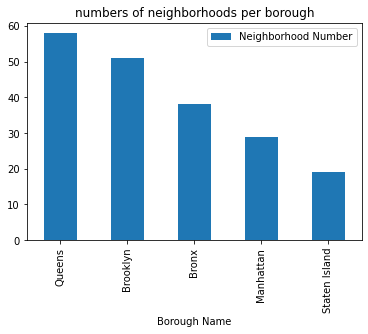

In [58]:
neighborhood_count.plot.bar(x='Borough Name', y='Neighborhood Number', title='numbers of neighborhoods per borough')

The above is a bar chart with numbers of neighborhoods per borough in New York City. 

### Trimming the data

There are some columns that we don't necessarily need in the dataset for our analysis. I will first find out the detailed information about the dataset use `info` command.

In [60]:
neighborhood.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   BoroCode    195 non-null    int64   
 1   BoroName    195 non-null    object  
 2   CountyFIPS  195 non-null    object  
 3   NTACode     195 non-null    object  
 4   NTAName     195 non-null    object  
 5   Shape_Leng  195 non-null    float64 
 6   Shape_Area  195 non-null    float64 
 7   geometry    195 non-null    geometry
dtypes: float64(2), geometry(1), int64(1), object(4)
memory usage: 12.3+ KB


Here is a detailed picture of what colomns exist in the dataset. I would love to keep BoroName, CountyFIPS, NTAName, and geometry column.

I will trim the rest of the colomn.

In [62]:
neighborhood[['BoroName','CountyFIPS','NTAName','geometry']]

,BoroName,CountyFIPS,NTAName,geometry
0,Brooklyn,047,Borough Park,"POLYGON ((990897.900 169268.121, 990588.252 16..."
1,Queens,081,Murray Hill,"POLYGON ((1038593.459 221913.355, 1039369.281 ..."
2,Queens,081,East Elmhurst,"POLYGON ((1022728.275 217530.808, 1023052.645 ..."
3,Queens,081,Hollis,"POLYGON ((1051539.660 201007.013, 1051920.726 ..."
4,Brooklyn,047,Homecrest,"POLYGON ((995746.857 161665.390, 995833.832 16..."
...,...,...,...,...
190,Queens,081,Elmhurst,"POLYGON ((1020851.425 210703.673, 1020860.825 ..."
191,Queens,081,Elmhurst-Maspeth,"POLYGON ((1014244.431 211378.830, 1014343.991 ..."
192,Staten Island,085,Todt Hill-Emerson Hill-Heartland Village-Light...,"POLYGON ((957104.002 161758.179, 957233.148 16..."
193,Staten Island,085,Old Town-Dongan Hills-South Beach,"POLYGON ((966187.482 153868.426, 966187.523 15..."


Here is the trimmed dataframe with the desired columns.

In [63]:
# subset based on desired columns
desired_columns=['BoroName','CountyFIPS','NTAName','geometry']
neighborhood[desired_columns]

,BoroName,CountyFIPS,NTAName,geometry
0,Brooklyn,047,Borough Park,"POLYGON ((990897.900 169268.121, 990588.252 16..."
1,Queens,081,Murray Hill,"POLYGON ((1038593.459 221913.355, 1039369.281 ..."
2,Queens,081,East Elmhurst,"POLYGON ((1022728.275 217530.808, 1023052.645 ..."
3,Queens,081,Hollis,"POLYGON ((1051539.660 201007.013, 1051920.726 ..."
4,Brooklyn,047,Homecrest,"POLYGON ((995746.857 161665.390, 995833.832 16..."
...,...,...,...,...
190,Queens,081,Elmhurst,"POLYGON ((1020851.425 210703.673, 1020860.825 ..."
191,Queens,081,Elmhurst-Maspeth,"POLYGON ((1014244.431 211378.830, 1014343.991 ..."
192,Staten Island,085,Todt Hill-Emerson Hill-Heartland Village-Light...,"POLYGON ((957104.002 161758.179, 957233.148 16..."
193,Staten Island,085,Old Town-Dongan Hills-South Beach,"POLYGON ((966187.482 153868.426, 966187.523 15..."


To preserve the new dataframe, I will use the `.copy()` command. 

In [65]:
neighborhood_trimmed=neighborhood[desired_columns].copy()
neighborhood_trimmed

,BoroName,CountyFIPS,NTAName,geometry
0,Brooklyn,047,Borough Park,"POLYGON ((990897.900 169268.121, 990588.252 16..."
1,Queens,081,Murray Hill,"POLYGON ((1038593.459 221913.355, 1039369.281 ..."
2,Queens,081,East Elmhurst,"POLYGON ((1022728.275 217530.808, 1023052.645 ..."
3,Queens,081,Hollis,"POLYGON ((1051539.660 201007.013, 1051920.726 ..."
4,Brooklyn,047,Homecrest,"POLYGON ((995746.857 161665.390, 995833.832 16..."
...,...,...,...,...
190,Queens,081,Elmhurst,"POLYGON ((1020851.425 210703.673, 1020860.825 ..."
191,Queens,081,Elmhurst-Maspeth,"POLYGON ((1014244.431 211378.830, 1014343.991 ..."
192,Staten Island,085,Todt Hill-Emerson Hill-Heartland Village-Light...,"POLYGON ((957104.002 161758.179, 957233.148 16..."
193,Staten Island,085,Old Town-Dongan Hills-South Beach,"POLYGON ((966187.482 153868.426, 966187.523 15..."


Now the new data frame with desired columns is ready for later analysis

## Plotting

Now I will visualize the data with the `plot()` command

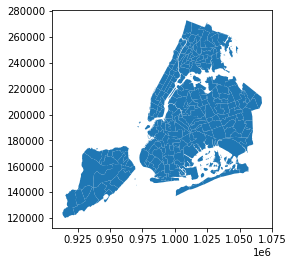

In [67]:
neighborhood_trimmed.plot()

Here is the visualization of the trimmed data frame.

I will now make the plot look prettier

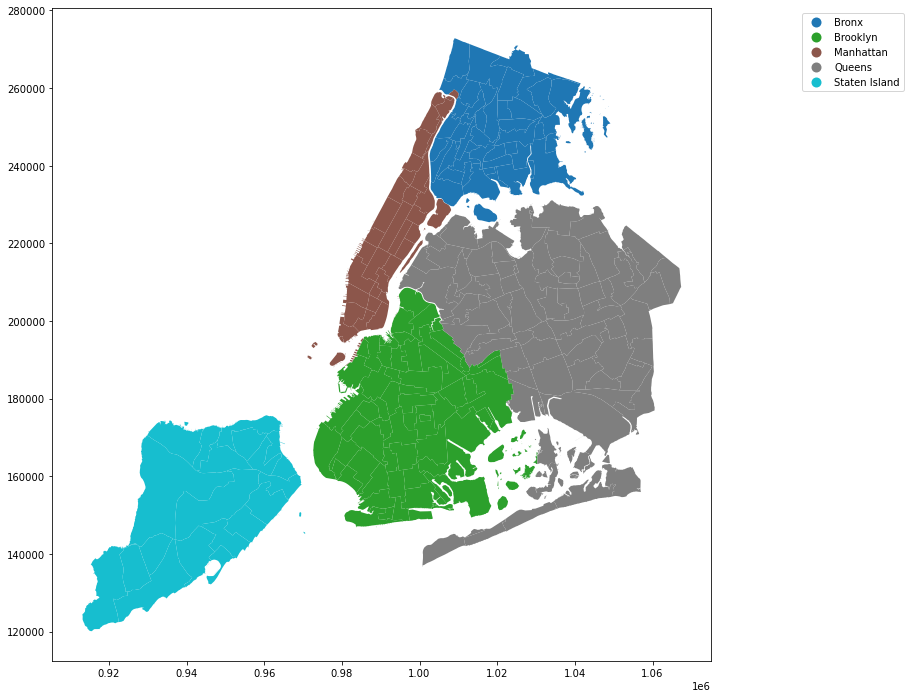

In [71]:
neighborhood_trimmed.plot(
           figsize=(20,12),   #size of the plot (a bit bigger than the default)
            column = 'BoroName',   # column that defines the color of the dots
            legend = True,     # add a legend           
            legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1.3,1)
            }                  # this puts the legend to the side
) 

Here you can see the color-coded boroughs with neighborhood polygons within each borough.